# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Import Dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID is irrelevant, so we'll exclude the column.

# Encoding Gender

In [4]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(dataset['Genre'].values.reshape((-1,1)))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [5]:
encoded_cols = list(encoder.get_feature_names())
encoded_cols

['x0_Female', 'x0_Male']

In [6]:
categorical_col = ['Genre']
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
dataset[numerical_cols + categorical_col]

,Age,Annual Income (k$),Spending Score (1-100),Genre
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
195,35,120,79,Female
196,45,126,28,Female
197,32,126,74,Male
198,32,137,18,Male


In [8]:
X = dataset[categorical_col + numerical_cols].copy()
X[encoded_cols] = encoder.transform( X['Genre'].values.reshape((-1,1)) )
X = X[numerical_cols + encoded_cols]
X

,Age,Annual Income (k$),Spending Score (1-100),x0_Female,x0_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


# Find Optimal K(Number of Clusters) Using Dendrogram

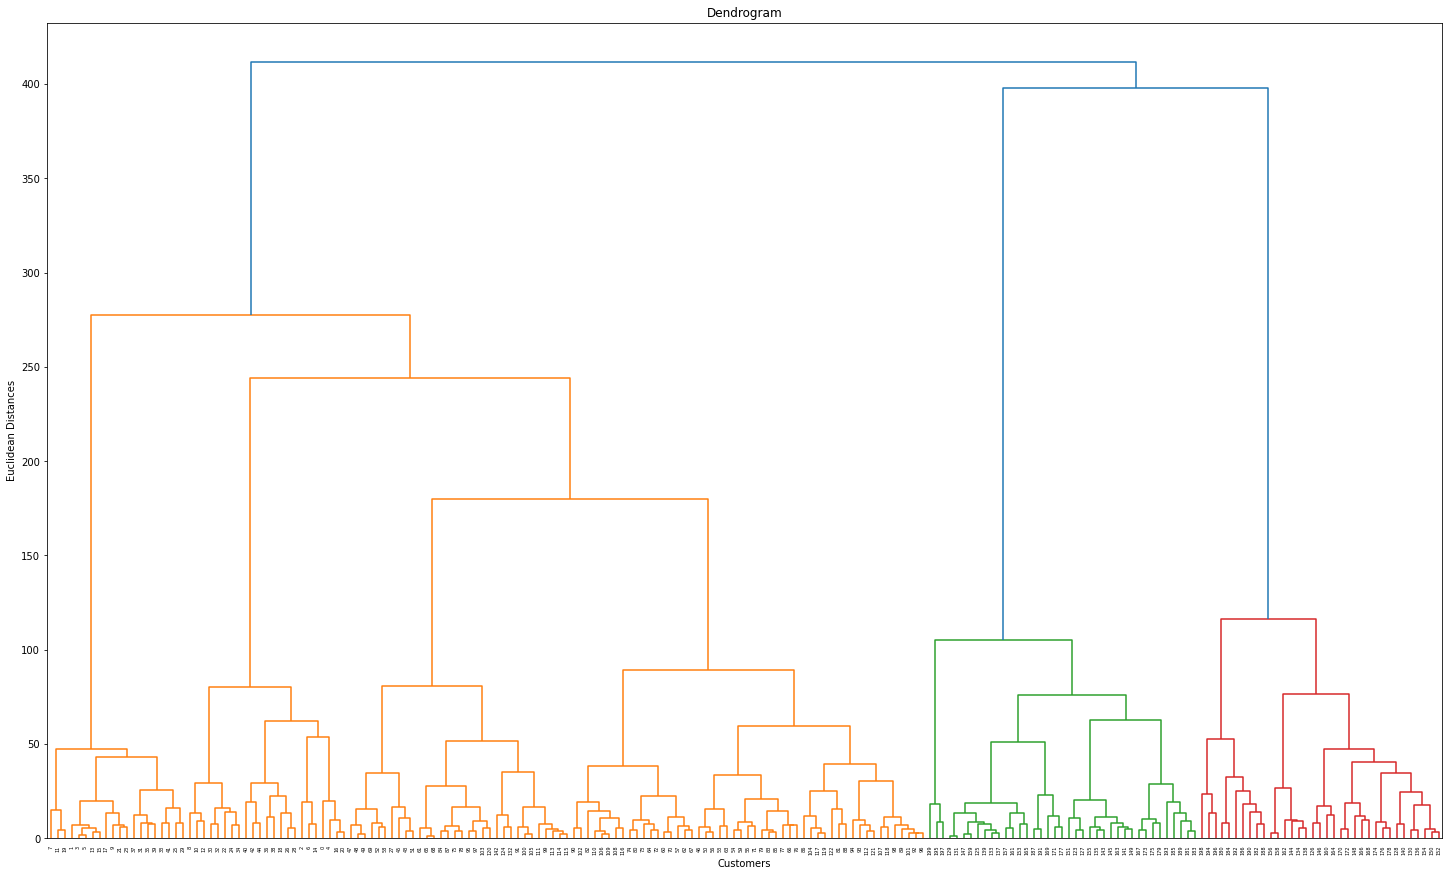

In [9]:
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

# Training Hierarchical Clustering

In [10]:
hc = AgglomerativeClustering(5,affinity='euclidean', linkage='ward')
y = hc.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [11]:
dataset['Clusters'] =y
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


# Visualize Clusters

In [12]:
X

,Age,Annual Income (k$),Spending Score (1-100),x0_Female,x0_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


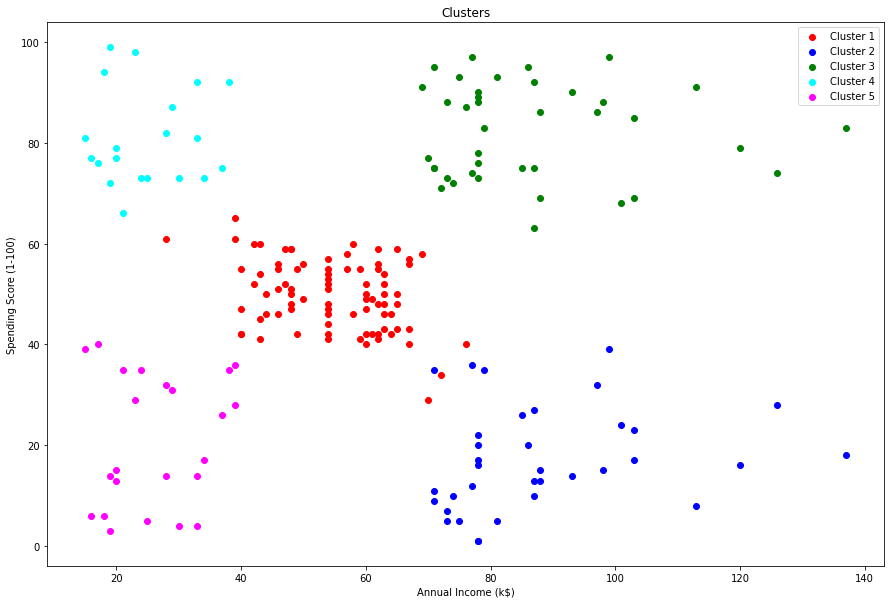

In [13]:
plt.figure(figsize=(15, 10));
plt.scatter(X[y==0]['Annual Income (k$)'], X[y==0]['Spending Score (1-100)'],c='red', label='Cluster 1');
plt.scatter(X[y==1]['Annual Income (k$)'], X[y==1]['Spending Score (1-100)'],c='blue', label='Cluster 2');
plt.scatter(X[y==2]['Annual Income (k$)'], X[y==2]['Spending Score (1-100)'],c='green', label='Cluster 3');
plt.scatter(X[y==3]['Annual Income (k$)'], X[y==3]['Spending Score (1-100)'],c='cyan', label='Cluster 4');
plt.scatter(X[y==4]['Annual Income (k$)'], X[y==4]['Spending Score (1-100)'],c='magenta', label='Cluster 5');

plt.title('Clusters')
plt.xlabel('Annual Income (k$)');
plt.ylabel('Spending Score (1-100)');
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']);
plt.show();

# Analysis
- Cluster 5 (Magenta) : People with low annual income and who spends lower in the mall. These are customers still less targeted.
<br><br>
- Cluster 2 (Blue) : People with high annual income and who still doesn't spend much money in the mall. These customers can be targeted so that they can be tempted to spend more in the mall. These are the customers with 3rd priority to be targeted (1 - Cluster 5, 2 - Cluster 2).
<br><br>
- Cluster 4 (Cyan) : People with low annual income and who spend a lot in the mall. These Customers are less targeted by the mall (if the mall wishes to so that the people with low income doesn't need to spend too much in the mall - ethics).
<br><br>
- Cluster 3 (Green) : People with higher annual income and who spends more in the mall. These customers are likely to buy more in the mall so they are the priority targets for the mall.
<br><br>
- Cluster 1 (Red) : People with average annual income and spends averagely in the mall.